In [391]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [392]:
df1 = pd.read_csv('2018-04-26_and_2018-05-26.csv', nrows=31)
df2 = pd.read_csv('2018-05-27_and_2018-06-26.csv', nrows=31)
df3 = pd.read_csv('2018-06-27_and_2018-07-27.csv', nrows=31)
df4 = pd.read_csv('2018-07-28_and_2018-08-26.csv', nrows=30)
df5 = pd.read_csv('2018-08-27_and_2018-09-26.csv', nrows=31)
df6 = pd.read_csv('2018-09-27_and_2018-10-27.csv', nrows=31)
df7 = pd.read_csv('2018-10-28_and-2018-11-27.csv', nrows=31)
df8 = pd.read_csv('2018-11-28_and_2018-12-28.csv', nrows=9)

In [393]:
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8], join="inner", ignore_index=True)

In [394]:
df.head(1)

,Date,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
0,4/26/18,"2,635","2,931",1.38,2,"1,347",93,0,0,566


In [395]:
df = df.rename(columns = {'Date':'date', 'Calories Burned':'calories_burned', 'Steps':'steps', 'Distance':'distance', 'Floors':'floors', 'Minutes Sedentary':'minutes_sedentary', 'Minutes Lightly Active':'minutes_lightly_active', 'Minutes Fairly Active':'minutes_fairly_active', 'Minutes Very Active':'minutes_very_active', 'Activity Calories':'activity_calories'})
df.head(1)

,date,calories_burned,steps,distance,floors,minutes_sedentary,minutes_lightly_active,minutes_fairly_active,minutes_very_active,activity_calories
0,4/26/18,"2,635","2,931",1.38,2,"1,347",93,0,0,566


In [397]:
df.isna().sum()

date                      0
calories_burned           0
steps                     0
distance                  0
floors                    0
minutes_sedentary         0
minutes_lightly_active    0
minutes_fairly_active     0
minutes_very_active       0
activity_calories         0
dtype: int64

In [399]:
# null_columns=df.columns[df.isnull().any()]
# print(df[df.isnull().any(axis=1)][null_columns].head())

In [352]:
# df.replace(np.nan, 0, inplace=True)

In [355]:
# df['date'] = pd.to_datetime(df['date'], format = "%Y%m%d").dt.strftime('%Y-%m-%d')

In [400]:
df.date = pd.to_datetime(df.date)

In [401]:
df = df.set_index('date')

In [402]:
df.head(1)

,calories_burned,steps,distance,floors,minutes_sedentary,minutes_lightly_active,minutes_fairly_active,minutes_very_active,activity_calories
date,,,,,,,,,
2018-04-26,"2,635","2,931",1.38,2,"1,347",93,0,0,566


In [403]:
df.dtypes[df.dtypes == 'object']

calories_burned      object
steps                object
minutes_sedentary    object
activity_calories    object
dtype: object

In [404]:
df.calories_burned = df.calories_burned.str.replace(',', '').astype(float)
df.minutes_sedentary = df.minutes_sedentary.str.replace(',', '').astype(float)
df.activity_calories = df.activity_calories.str.replace(',', '').astype(float)
df.steps = df.steps.str.replace(',', '').astype(float)

In [405]:
df.dtypes

calories_burned           float64
steps                     float64
distance                  float64
floors                      int64
minutes_sedentary         float64
minutes_lightly_active      int64
minutes_fairly_active       int64
minutes_very_active         int64
activity_calories         float64
dtype: object

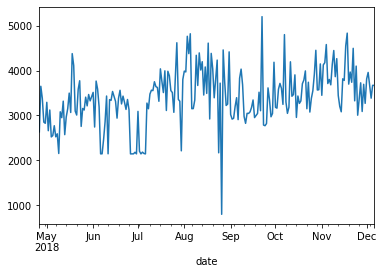

In [406]:
df.calories_burned.resample('D').mean().plot()